In [28]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd #for csv
import scipy.io as sio
import math

from sklearn.linear_model import LogisticRegression

# load the information in the file in a format that python can interpret
matTrainData = sio.loadmat("train.mat")
matTestData = sio.loadmat("test.mat")
#print(matData)
#matData.items() # 得知有哪些 items

#如何 element wise concate
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html
trainDataX = np.concatenate((np.array(matTrainData["x1"]), np.array(matTrainData["x2"])), axis=1 )
#print(trainDataX)
trainDataY = np.concatenate(np.array(matTrainData["y"]))
print(trainDataY)

testX = np.concatenate((np.array(matTestData["x1"]), np.array(matTestData["x2"])), axis=1 )
testY = np.concatenate(np.array(matTestData["y"]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [29]:
### Q1-5 ###
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

logreg.fit(trainDataX, trainDataY)
predictY = logreg.predict(testX)
#print(predictY)
#print(testY)
print(logreg.intercept_)
print(logreg.coef_)
count = 0
for i in range(len(predictY)):
    if predictY[i] != testY[i]:
        count +=1
print("percentage of misclassified test samples: %d %%" % (count/len(predictY)*100))

[37.85898317]
[[-18.34633961  19.23702253]]
percentage of misclassified test samples: 3 %


In [41]:
### Q1-6 ###
#P(C|x) -> P(C^x)/P(x) = h(θ) = 1/(1 + e**(-θ0 -θ1*x1 - θ2*x2) )

#initial values
θ0 = 37
θ1 = -18
θ2 = 19
lr = 0.00001
iteration = 100000

θ0Lr = 0.0
θ1Lr = 0.0
θ2Lr = 0.0

θ0_history = [θ0]
θ1_history = [θ1]
θ2_history = [θ2]    

print(len(trainDataX))

#print(trainDataX)

for i in range(iteration):
    θ0Grad = 0.0
    θ1Grad = 0.0
    θ2Grad = 0.0
    
    if i % 500 == 0:
        print(θ0, θ1, θ2)
#        print(θ0Lr, θ1Lr, θ2Lr)
    
    #計算 gradient
    for n in range(len( trainDataX)):
        x1 = trainDataX[n][0]
        x2 = trainDataX[n][1]
#        print(1/(1 + np.exp(-θ0 -θ1*x1 - θ2*x2)))
        θ0Grad += -(trainDataY[n] - 1/(1 + np.exp(-θ0 -θ1*x1 - θ2*x2)))*1
        θ1Grad += -(trainDataY[n] - 1/(1 + np.exp(-θ0 -θ1*x1 - θ2*x2)))*x1
        θ2Grad += -(trainDataY[n] - 1/(1 + np.exp(-θ0 -θ1*x1 - θ2*x2)))*x2
    
    θ0Lr += θ0Grad ** 2
    θ1Lr += θ1Grad ** 2
    θ2Lr += θ2Grad ** 2
    
    #更新 gradient
    θ0 = θ0 - lr * θ0Grad
    θ1 = θ1 - lr * θ1Grad
    θ2 = θ2 - lr * θ2Grad
    
    # Store parameters for plotting
    θ0_history.append(θ0)
    θ1_history.append(θ1)
    θ2_history.append(θ2)
    


70
37 -18 19
36.99999897490847 -18.00003936338671 19.00007223672814
36.999997943353684 -18.000078761041802 19.000144451829808
36.99999690545695 -18.000118192323782 19.000216645679707
36.999995861337275 -18.00015765660302 19.000288818645554
36.99999481111163 -18.000197153261546 19.000360971088302
36.99999375489465 -18.0002366816926 19.000433103362376
36.99999269279901 -18.0002762413006 19.000505215815604
36.999991624935255 -18.000315831500885 19.00057730878949
36.999990551411926 -18.000355451719606 19.00064938261919
36.99998947233549 -18.000395101393426 19.00072143763373
36.999988387810575 -18.000434779969286 19.00079347415618
36.99998729793971 -18.00047448690442 19.00086549250357
36.99998620282389 -18.000514221665874 19.00093749298714
36.99998510256192 -18.000553983730608 19.001009475912507
36.999983997250865 -18.000593772585088 19.0010814415795
36.99998288698611 -18.00063358772527 19.00115339028264
36.99998177186118 -18.000673428656395 19.00122532231081
36.99998065196789 -18.000713294

36.999817603176524 -18.005921099514694 19.01042786312977
36.99981626317751 -18.005962141186778 19.010498884655576
36.999814922880155 -18.006003184524513 19.0105699036024
36.999813582292674 -18.006044229485024 19.010640919995392
36.99981224142299 -18.006085276026106 19.010711933859234
36.999810900278945 -18.006126324106432 19.010782945218107
36.999809558868165 -18.006167373685376 19.01085395409582
36.99980821719821 -18.006208424723063 19.01092496051566
36.9998068752765 -18.00624947718035 19.010995964500594
36.99980553311027 -18.006290531018852 19.011066966073102
36.99980419070667 -18.006331586200837 19.011137965255276
36.99980284807267 -18.00637264268928 19.011208962068782
36.9998015052152 -18.006413700447858 19.011279956534874
36.99980016214095 -18.006454759440885 19.01135094867447
36.99979881885652 -18.006495819633358 19.011421938508086
36.99979747536849 -18.00653688099085 19.011492926055844
36.99979613168317 -18.006577943479623 19.01156391133753
36.99979478780685 -18.0066190070666 19

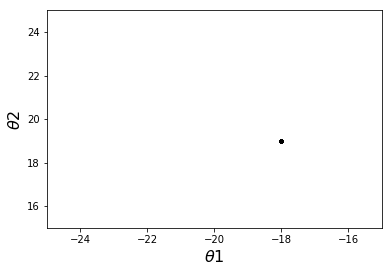

[36.99974497808698, -18.00813887794154, 19.014259836042328]


In [42]:
#plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(θ1_history, θ2_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-25,-15)
plt.ylim(15,25)
plt.xlabel(r'$θ1$', fontsize=16)
plt.ylabel(r'$θ2$', fontsize=16)
plt.show()

print([θ0, θ1, θ2])